### TF-IDF練習: 王世堅 韓國瑜

In [4]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, './modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [5]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 10


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [37]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['王世堅', '韓國瑜'])

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = ['為何','的', '是', '在', '有', '就','能','但','？','-',':',' ', '...'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)


In [38]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('韓國瑜', 12),
 ('收服', 3),
 ('王世堅', 15),
 ('柯文', 6),
 ('哲', 3),
 ('不行', 3),
 ('網友', 4),
 ('神解', 1),
 ('聯合', 1),
 ('新聞網', 1)]

In [39]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,地,英明,幕僚,至少,面對,奮進,嚴厲,進去,說明,而且,...,從辭,了,此事,跳海,發言人,汽油,繼續,名單,自己,聽
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [40]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
df_tfidf = evaluate_tfidf(wfm) 

In [41]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [42]:
logdf

[0.2218487496163564,
 1.0,
 0.6989700043360189,
 0.6989700043360189,
 1.0,
 1.0,
 0.6989700043360189,
 0.6989700043360189,
 0.6989700043360189,
 1.0,
 0.6989700043360189,
 0.6989700043360189,
 1.0,
 0.3979400086720376,
 1.0,
 0.6989700043360189,
 1.0,
 0.3979400086720376,
 0.2218487496163564,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6989700043360189,
 1.0,
 0.6989700043360189,
 1.0,
 1.0,
 0.6989700043360189,
 1.0,
 1.0,
 0.3979400086720376,
 0.2218487496163564,
 0.6989700043360189,
 1.0,
 0.2218487496163564,
 1.0,
 1.0,
 1.0,
 0.6989700043360189,
 0.04575749056067514,
 1.0,
 0.0,
 1.0,
 0.6989700043360189,
 1.0,
 1.0,
 1.0,
 0.5228787452803376,
 1.0,
 0.6989700043360189,
 1.0,
 0.3010299956639812,
 0.6989700043360189,
 1.0,
 1.0,
 0.5228787452803376,
 1.0,
 0.6989700043360189,
 1.0,
 0.6989700043360189,
 0.3979400086720376,
 0.6989700043360189,
 1.0,
 0.6989700043360189,
 0.5228787452803376,
 1.0,
 1.0,
 0.3010299956639812,
 1.0,
 0.3010299956639812,
 0.6989700043360189,
 0.6989700043360189,
 0.698

In [43]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [44]:
wfm['收服']

0    3.0
1    3.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: 收服, dtype: float64

In [45]:
df_tfidf['政治']

0    0.000000
1    0.000000
2    0.221849
3    0.000000
4    0.221849
5    0.443697
6    0.443697
7    0.221849
8    0.221849
9    0.000000
Name: 政治, dtype: float64

### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [46]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('地', 0.0),
 ('英明', 0.0),
 ('幕僚', 0.0),
 ('至少', 0.0),
 ('面對', 0.0),
 ('奮進', 0.0),
 ('嚴厲', 1.0),
 ('進去', 0.0),
 ('說明', 0.0),
 ('而且', 0.0)]

### 文字雲

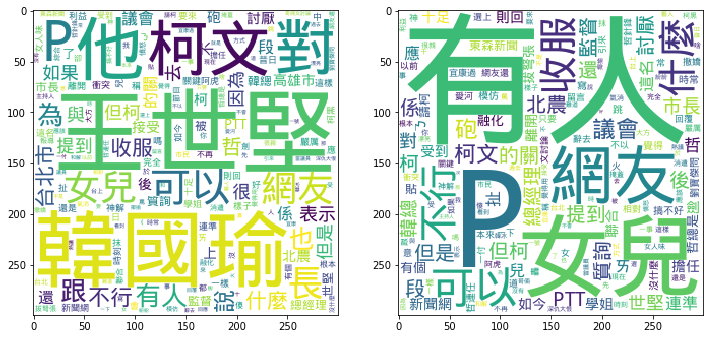

In [47]:
linux_font = r'wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

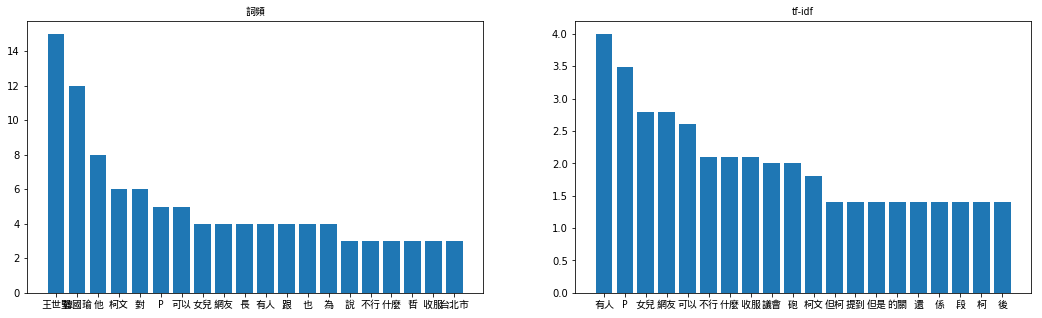

In [48]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 